In [157]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import * 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
#Reading the data
url = "F:/ML/Git ML/CreditDefault/credit.csv"
df = pd.read_csv(url)
df.shape
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [3]:
#replace unknowns with nan
dfn= df.replace(to_replace="unknown", value = np.nan)
print (dfn)

    checking_balance  months_loan_duration credit_history  \
0             < 0 DM                     6       critical   
1         1 - 200 DM                    48           good   
2                NaN                    12       critical   
3             < 0 DM                    42           good   
4             < 0 DM                    24           poor   
5                NaN                    36           good   
6                NaN                    24           good   
7         1 - 200 DM                    36           good   
8                NaN                    12           good   
9         1 - 200 DM                    30       critical   
10        1 - 200 DM                    12           good   
11            < 0 DM                    48           good   
12        1 - 200 DM                    12           good   
13            < 0 DM                    24       critical   
14            < 0 DM                    15           good   
15            < 0 DM    

In [4]:
#getting the list of columns with nan
ml= dfn.columns[dfn.isna().any()].tolist()
ml

['checking_balance', 'savings_balance']

In [5]:
#filling the nans with the ratio
dfm=dfn
#drc = pd.DataFrame(columns = ml)
for item in  ml:
    #getting the ratio of the index labels
    val =pd.DataFrame(dfn[item].value_counts(normalize=True))
    print ("The probability ratio before filling the missing vlaues in %s is" % item )
    print (dfn[item].value_counts(normalize=True))
    #index labels in a list
    valr = val.index.tolist()
    #drc.index = valr
    #columns values in a list
    valc =val[item].tolist()
    #replacing the nan values with ratio
    dfm[item] = dfm[item].fillna(pd.Series(np.random.choice(valr,p=valc, size=len(dfm))))
    #sanity check
    print ("The probability ratio after filling the missing vlaues in %s is" % item )
    print ((dfm[item].value_counts(normalize=True)))



The probability ratio before filling the missing vlaues in checking_balance is
< 0 DM        0.452145
1 - 200 DM    0.443894
> 200 DM      0.103960
Name: checking_balance, dtype: float64
The probability ratio after filling the missing vlaues in checking_balance is
1 - 200 DM    0.450
< 0 DM        0.447
> 200 DM      0.103
Name: checking_balance, dtype: float64
The probability ratio before filling the missing vlaues in savings_balance is
< 100 DM         0.738066
100 - 500 DM     0.126071
500 - 1000 DM    0.077111
> 1000 DM        0.058752
Name: savings_balance, dtype: float64
The probability ratio after filling the missing vlaues in savings_balance is
< 100 DM         0.730
100 - 500 DM     0.131
500 - 1000 DM    0.075
> 1000 DM        0.064
Name: savings_balance, dtype: float64


In [6]:
dfm #sanity check

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,< 100 DM,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,< 0 DM,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,1 - 200 DM,36,good,education,9055,< 100 DM,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,1 - 200 DM,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,< 0 DM,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [7]:
#binaru conversion
dfm.replace(to_replace="yes", value = 1, inplace= True)
dfm.replace(to_replace="no", value = 0, inplace= True)
dfm

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,< 100 DM,> 7 years,4,4,67,none,own,2,skilled,1,1,0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,0,1
2,< 0 DM,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,0,0
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,0,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,0,1
5,1 - 200 DM,36,good,education,9055,< 100 DM,1 - 4 years,2,4,35,none,other,1,unskilled,2,1,0
6,1 - 200 DM,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,0,0
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,1,0
8,< 0 DM,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,0,0
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,0,1


In [112]:
#dependent variable
dfy=dfm.iloc[:,-1]
#independent variable
dfx=dfm.iloc[:,:-1]


In [113]:
#converting categorical data to numerical
dfxmc=pd.get_dummies(dfx)


In [114]:
#normalizing
dfxmcn = (dfxmc-dfxmc.min())/(dfxmc.max()-dfxmc.min())
dfxmcn

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,checking_balance_1 - 200 DM,checking_balance_< 0 DM,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.470588,0.484483,0.333333,1.000000,0.285714,0.000000,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.294118,0.142236,0.666667,1.000000,0.607143,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.470588,0.368548,0.333333,0.333333,0.285714,0.000000,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,0.117647,0.154561,0.333333,1.000000,0.750000,0.000000,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,0.382353,0.274238,1.000000,0.333333,0.160714,0.333333,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [117]:
#defining a function for adjusted r square
def adjustedR(Ytest,ypredict,n,p):
    r2 = r2_score(Ytest,ypredict)
    adjustedr2 = 1-((1-r2)*((n-1)/(n-p-1)))
    #where n is number of observations in sample and p is number of independent variables in model
    return adjustedr2


In [162]:
#defing the training and validation datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(dfxmcn, dfy, test_size=0.20, random_state=7)

In [163]:
#defing the ROC curve
def ROCcurve(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return (plt.show())

In [164]:
#listing out the different ML Algorithms
models = []
models.append(('Logistic Regression with l1 penalty', LogisticRegression(penalty='l1',random_state= 7)))
models.append(('Logistic Regression with l1 penalty', LogisticRegression(penalty='l2',random_state= 7,dual=False)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('Random Forest with Entropy', RandomForestClassifier(n_estimators=500, criterion= "entropy", random_state= 7)))
models.append(('Random Forest with gini', RandomForestClassifier(n_estimators=500, criterion= "gini", random_state= 7)))
models.append(('DecisionTree with entropy', DecisionTreeClassifier(criterion= "entropy", random_state= 7)))
models.append(('DecisionTree with gini', DecisionTreeClassifier(criterion= "gini", random_state= 7)))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))


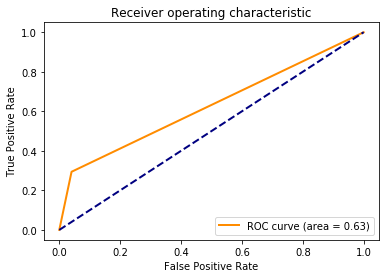

Logistic Regression with l1 penalty None


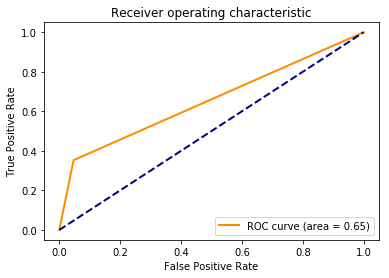

Logistic Regression with l1 penalty None


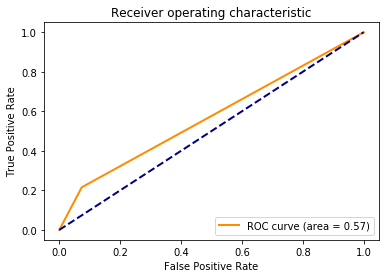

KNN None


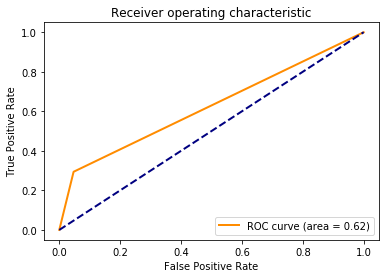

Random Forest with Entropy None


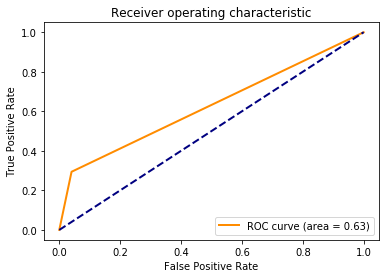

Random Forest with gini None


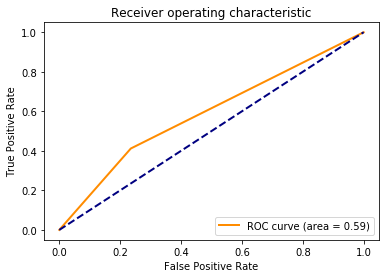

DecisionTree with entropy None


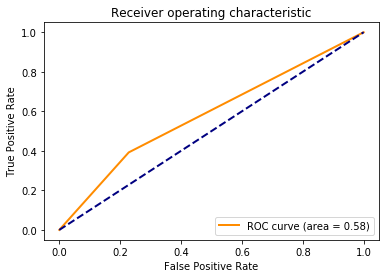

DecisionTree with gini None


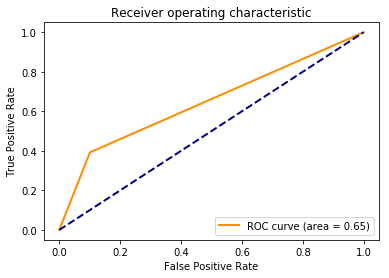

Gaussian Naive Bayes None


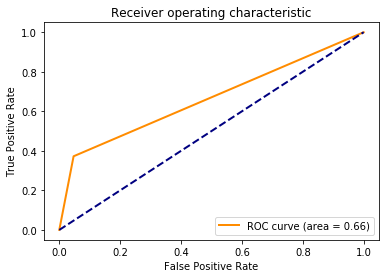

Linear Discriminant Analysis None
                                 Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       79    0.42               0.047
1  Logistic Regression with l1 penalty       80    0.47               0.045
2                                  KNN       74     0.3               0.057
3           Random Forest with Entropy       78    0.41               0.048
4              Random Forest with gini       79    0.42               0.047
5            DecisionTree with entropy       68    0.39               0.073
6               DecisionTree with gini       68    0.38               0.073
7                 Gaussian Naive Bayes       77    0.47               0.052
8         Linear Discriminant Analysis       80    0.49               0.044


In [170]:
#function to run the models for the datasets
def allmodels():
    model_list = pd.DataFrame(columns=("Model","Accuracy","F1Score","Diff of Adj R and R")) 
    rownumber = 0
    for name, model in models:
        classifier = model
        classifier.fit(X_train, Y_train)
        # prediction
        Y_predict = classifier.predict(X_test)
        fpr, tpr, thresholds = roc_curve(Y_test, Y_predict, pos_label=1)
        print(name,ROCcurve(fpr, tpr))
        r2 = abs(r2_score(Y_test,Y_predict))
        adjustedr = abs(adjustedR(Y_test,Y_predict,len(dfxmcn),len(dfxmcn.columns)))
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"Accuracy"] = round(((accuracy_score(Y_test,Y_predict))*100))
        model_list.loc[rownumber,"F1Score"]= round((f1_score(Y_test,Y_predict)),2)
        model_list.loc[rownumber,"Diff of Adj R and R"] = round ((adjustedr-r2),3)
        #print (confusion_matrix(Y_test,Y_predict))
        #print ("The f1 score is : %0.2f" % (f1_score(Y_test,Y_predict)))
        #print ("The r2 score is : %0.2f"% (r2_score(Y_test,Y_predict)))
        #print ("The adjusted r2 score is : %0.2f"% (adjustedR(Y_test,Y_predict,len(dfxmcn),len(dfxmcn.columns))))
        #model_list.append(msg)
        rownumber += 1
    return (model_list)
analysisdf = allmodels()
print (analysisdf)

From the ROC curve we can elimninate KNN, as it has a bad ROC graph.
Now there are 3 models that give 80% accuracy and among them, the "Random Forest with gini" has the highest f1 score and lowest difference between adjusted r square and r square.

Interesting note is that GNB has a better roc curve and the best f1 score but since it does not have a good accuracy we have to eliminate it

Now lets see if there is any difference after we apply the PCA

First we will plot all the principal componets and see its decreasing variance

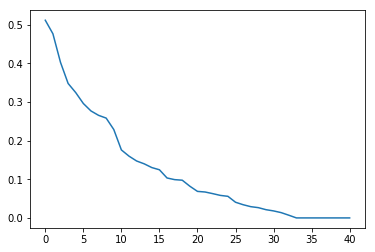

In [181]:
#PCA
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(dfxmcn, dfy, test_size=0.20, random_state=7)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
ev= pca.explained_variance_ratio_
#plt.plot(ev)
var_values = pca.explained_variance_
plt.plot(var_values)

We can see that the steep is linear between 10 to 30, so we can assume that the ideal number of principal components can lie within this range. So lets try the model results for increasing number of PCs

In [167]:
for i in range(1,41):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(dfxmcn, dfy, test_size=0.20, random_state=7)
    pca = PCA(n_components= i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    ev= pca.explained_variance_ratio_
    pcadf = allmodels()
    print (i,pcadf)

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       74       0               0.057
1  Logistic Regression with l1 penalty       74       0               0.057
2                                  KNN       71       0               0.065
3           Random Forest with Entropy       57    0.23               0.097
4              Random Forest with gini       57    0.23               0.097
5            DecisionTree with entropy       57    0.23               0.097
6               DecisionTree with gini       57    0.23               0.097
7                 Gaussian Naive Bayes       74       0               0.057
8         Linear Discriminant Analysis       74       0               0.057


F:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


2                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       74       0               0.057
1  Logistic Regression with l1 penalty       74       0               0.057
2                                  KNN       72    0.18               0.062
3           Random Forest with Entropy       68    0.22               0.073
4              Random Forest with gini       68    0.24               0.073
5            DecisionTree with entropy       62    0.31               0.087
6               DecisionTree with gini       59    0.23               0.092
7                 Gaussian Naive Bayes       74       0               0.057
8         Linear Discriminant Analysis       74       0               0.057
3                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       74       0               0.057
1  Logistic Regression with l1 penalty       74       0               0.057
2       

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


4                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       74       0               0.057
1  Logistic Regression with l1 penalty       74       0               0.057
2                                  KNN       72    0.26               0.064
3           Random Forest with Entropy       72    0.36               0.064
4              Random Forest with gini       72    0.36               0.063
5            DecisionTree with entropy       66    0.39               0.077
6               DecisionTree with gini       64    0.38                0.08
7                 Gaussian Naive Bayes       74    0.04               0.059
8         Linear Discriminant Analysis       74       0               0.059
5                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       74       0               0.059
1  Logistic Regression with l1 penalty       74       0               0.059
2       

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


6                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       74       0               0.059
1  Logistic Regression with l1 penalty       74       0               0.059
2                                  KNN       72     0.2               0.062
3           Random Forest with Entropy       72    0.34               0.062
4              Random Forest with gini       72    0.35               0.062
5            DecisionTree with entropy       66    0.43               0.077
6               DecisionTree with gini       60    0.38               0.089
7                 Gaussian Naive Bayes       74       0               0.057
8         Linear Discriminant Analysis       74       0               0.059


F:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


7                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       74       0               0.057
1  Logistic Regression with l1 penalty       74       0               0.057
2                                  KNN       74    0.27                0.06
3           Random Forest with Entropy       77    0.42               0.052
4              Random Forest with gini       76    0.41               0.055
5            DecisionTree with entropy       62    0.34               0.087
6               DecisionTree with gini       61    0.36               0.088
7                 Gaussian Naive Bayes       74       0               0.057
8         Linear Discriminant Analysis       74       0               0.057
8                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       72     0.1               0.064
1  Logistic Regression with l1 penalty       71    0.09               0.065
2       

18                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       76    0.34               0.053
1  Logistic Regression with l1 penalty       76    0.33               0.055
2                                  KNN       74    0.26               0.059
3           Random Forest with Entropy       80    0.43               0.044
4              Random Forest with gini       78    0.35                0.05
5            DecisionTree with entropy       68    0.42               0.072
6               DecisionTree with gini       70    0.47               0.066
7                 Gaussian Naive Bayes       76    0.33               0.054
8         Linear Discriminant Analysis       76    0.37               0.053
19                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       78    0.39                0.05
1  Logistic Regression with l1 penalty       77    0.38               0.052
2     

29                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       79    0.43               0.047
1  Logistic Regression with l1 penalty       78    0.43               0.048
2                                  KNN       72     0.2               0.063
3           Random Forest with Entropy       78    0.35                0.05
4              Random Forest with gini       80    0.44               0.046
5            DecisionTree with entropy       68    0.42               0.072
6               DecisionTree with gini       70    0.44               0.069
7                 Gaussian Naive Bayes       76    0.45               0.054
8         Linear Discriminant Analysis       80    0.47               0.046
30                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       80    0.44               0.046
1  Logistic Regression with l1 penalty       79    0.43               0.047
2     

40                                  Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       79    0.43               0.047
1  Logistic Regression with l1 penalty       79    0.45               0.047
2                                  KNN       72    0.18               0.063
3           Random Forest with Entropy       80    0.44               0.045
4              Random Forest with gini       79    0.42               0.047
5            DecisionTree with entropy       66    0.32               0.078
6               DecisionTree with gini       64    0.37                0.08
7                 Gaussian Naive Bayes       78    0.55               0.051
8         Linear Discriminant Analysis       80    0.48               0.046


Now we can see in the previous results the models that predicted 80 are not same models. At PC=25, LDA has a better F1 score although the accuracy is 80. Now lets see the roc curve for PC=25

In [183]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(dfxmcn, dfy, test_size=0.20, random_state=7)
pca = PCA(n_components= 25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


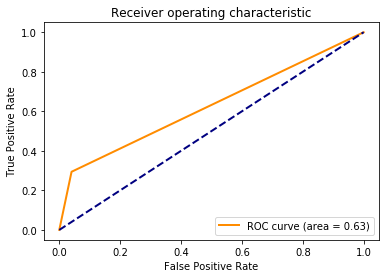

Logistic Regression with l1 penalty None


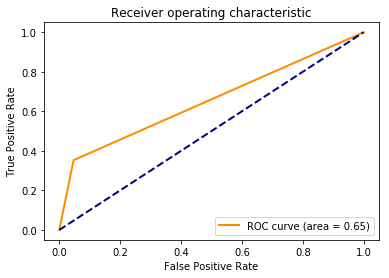

Logistic Regression with l1 penalty None


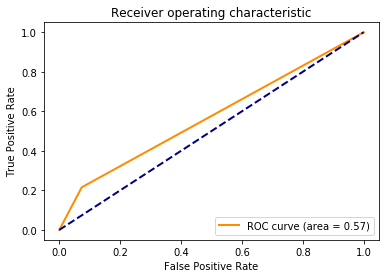

KNN None


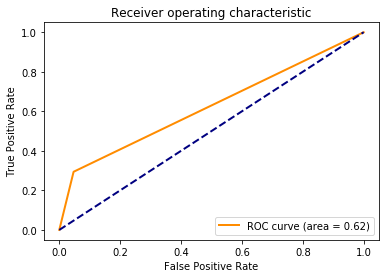

Random Forest with Entropy None


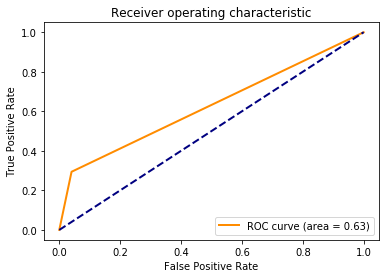

Random Forest with gini None


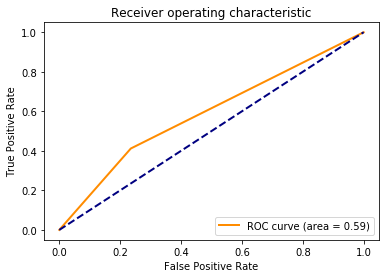

DecisionTree with entropy None


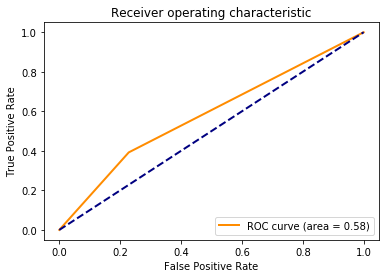

DecisionTree with gini None


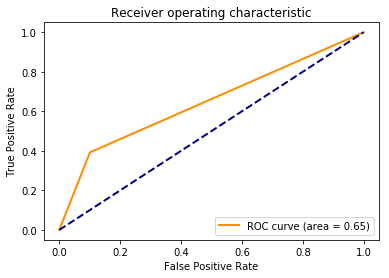

Gaussian Naive Bayes None


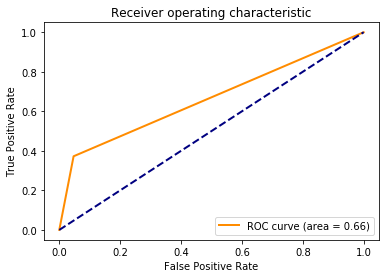

Linear Discriminant Analysis None
                                 Model Accuracy F1Score Diff of Adj R and R
0  Logistic Regression with l1 penalty       79    0.42               0.047
1  Logistic Regression with l1 penalty       80    0.47               0.045
2                                  KNN       74     0.3               0.057
3           Random Forest with Entropy       78    0.41               0.048
4              Random Forest with gini       79    0.42               0.047
5            DecisionTree with entropy       68    0.39               0.073
6               DecisionTree with gini       68    0.38               0.073
7                 Gaussian Naive Bayes       77    0.47               0.052
8         Linear Discriminant Analysis       80    0.49               0.044


In [184]:
pcadf = allmodels()
print (pcadf)

Even here the LDA has the best ROC curve.

Conclusion: For Credit Default Prediction, LDA, after PCA(25) transformation (dimension reduction) gives the best result.